In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Load other libraries necessary
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Let us take a loot at the image

(1125, 1600)


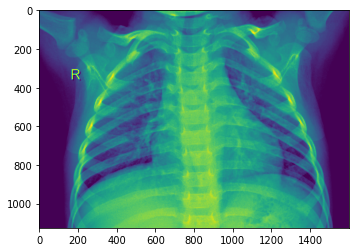

In [3]:
#Read the image in the directory
img = Image.open("dataset/train/NORMAL/IM-0125-0001.jpeg")

#Create a numpy array for the img
img_array = np.array(img)

#Take a look at the shape
print(img_array.shape)

#display the image
imgplot = plt.imshow(img_array)


### Let us Resize the image to ease performance of Neural Net

In [4]:
#Let us resize the image to approx (128,128) maintaining aspect ratio. This would help store the images and fasten the network
def Img_resize(img,size=(256,256)):
    img = img.resize(size)
    return img
    
size = (128, 128)
img = Img_resize(img,size)


### Histogram Equilization

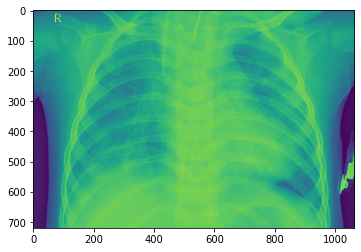

In [5]:
img = Image.open('dataset/test/PNEUMONIA/person101_bacteria_483.jpeg')
plt.imshow(img)

The histogram of X-Ray is given as follows:


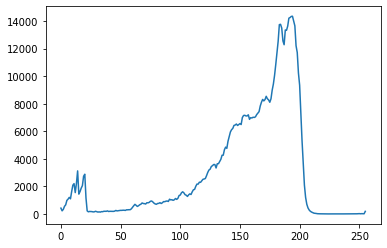

In [6]:
print('The histogram of X-Ray is given as follows:')
plt.plot(img.histogram())

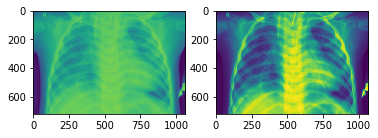

In [7]:
#Let us equilaize the image histogram
im2 = ImageOps.equalize(img)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(im2)

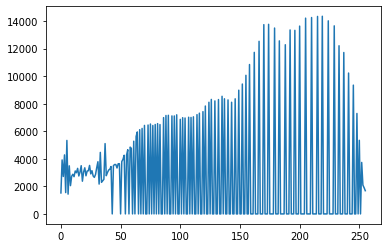

In [8]:
plt.plot(im2.histogram())

### Build the training dataset 

In [9]:
# The image is a grey-scale image of dimension (128, 128). Let us start building the training dataset containing the pixels of image flattened and label indicating presence of pneumonia

# First let us build a binary classifciation to classify Pneumonia vs No-Pneumonia X-rays. Further we shall think of classifying Viral and Bacterial Pneumonia

In [10]:
# Let us build the pixel_cols required in the dataframe
pixel_cols = []
for i in range(256*256):
    pixel_cols.append('pixel'+str(i))
len(pixel_cols)

65536

In [11]:
#define the remaining cols of the dataset
data_col = pixel_cols.copy()
data_col.append('X_Ray_Class')
data_col.append('Pneumonia_Class')
data_col[-5:]

['pixel65533', 'pixel65534', 'pixel65535', 'X_Ray_Class', 'Pneumonia_Class']

In [12]:
#Let us build the training dataframe
train_df = pd.DataFrame(columns = data_col)
train_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class


### Loading the training datasets into the dataframe

In [38]:
#First let us start by loading the NORMAL chest x_rays from the training set
count = 0
for dirname, _, filenames in os.walk('dataset/train/NORMAL'):
    for filename in filenames:
        img = Image.open(os.path.join(dirname, filename))
        #Equilize th histogram
        img = ImageOps.equalize(img)
        #Resize the image
        img = Img_resize(img)
        img_array = np.array(img).reshape(img.size[0]*img.size[1]).tolist()
        img_array = img_array + ['Normal','None']
        train_df = train_df.append(pd.Series(img_array,index=data_col),ignore_index=True)
        count = count + 1
        print('Training data ',count,' loaded into the dataframe')

dataset/train/NORMAL/NORMAL2-IM-0727-0001.jpeg
dataset/train/NORMAL/IM-0541-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-1333-0001.jpeg
dataset/train/NORMAL/IM-0531-0001.jpeg
dataset/train/NORMAL/IM-0195-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-0936-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-1156-0001.jpeg
dataset/train/NORMAL/IM-0629-0001-0001.jpeg
dataset/train/NORMAL/IM-0612-0001-0002.jpeg
dataset/train/NORMAL/IM-0480-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-0535-0001-0002.jpeg
dataset/train/NORMAL/NORMAL2-IM-1305-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-0899-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-1293-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-0671-0001.jpeg
dataset/train/NORMAL/IM-0524-0001.jpeg
dataset/train/NORMAL/IM-0546-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-0589-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-1308-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM-0906-0001.jpeg
dataset/train/NORMAL/IM-0535-0001.jpeg
dataset/train/NORMAL/IM-0300-0001.jpeg
dataset/train/NORMAL/NORMAL2-IM

Training data  924  loaded into the dataframe
Training data  925  loaded into the dataframe
Training data  926  loaded into the dataframe
Training data  927  loaded into the dataframe
Training data  928  loaded into the dataframe
Training data  929  loaded into the dataframe
Training data  930  loaded into the dataframe
Training data  931  loaded into the dataframe
Training data  932  loaded into the dataframe
Training data  933  loaded into the dataframe
Training data  934  loaded into the dataframe
Training data  935  loaded into the dataframe
Training data  936  loaded into the dataframe
Training data  937  loaded into the dataframe
Training data  938  loaded into the dataframe
Training data  939  loaded into the dataframe
Training data  940  loaded into the dataframe
Training data  941  loaded into the dataframe
Training data  942  loaded into the dataframe
Training data  943  loaded into the dataframe
Training data  944  loaded into the dataframe
Training data  945  loaded into th

Training data  1100  loaded into the dataframe
Training data  1101  loaded into the dataframe
Training data  1102  loaded into the dataframe
Training data  1103  loaded into the dataframe
Training data  1104  loaded into the dataframe
Training data  1105  loaded into the dataframe
Training data  1106  loaded into the dataframe
Training data  1107  loaded into the dataframe
Training data  1108  loaded into the dataframe
Training data  1109  loaded into the dataframe
Training data  1110  loaded into the dataframe
Training data  1111  loaded into the dataframe
Training data  1112  loaded into the dataframe
Training data  1113  loaded into the dataframe
Training data  1114  loaded into the dataframe
Training data  1115  loaded into the dataframe
Training data  1116  loaded into the dataframe
Training data  1117  loaded into the dataframe
Training data  1118  loaded into the dataframe
Training data  1119  loaded into the dataframe
Training data  1120  loaded into the dataframe
Training data

Training data  1275  loaded into the dataframe
Training data  1276  loaded into the dataframe
Training data  1277  loaded into the dataframe
Training data  1278  loaded into the dataframe
Training data  1279  loaded into the dataframe
Training data  1280  loaded into the dataframe
Training data  1281  loaded into the dataframe
Training data  1282  loaded into the dataframe
Training data  1283  loaded into the dataframe
Training data  1284  loaded into the dataframe
Training data  1285  loaded into the dataframe
Training data  1286  loaded into the dataframe
Training data  1287  loaded into the dataframe
Training data  1288  loaded into the dataframe
Training data  1289  loaded into the dataframe
Training data  1290  loaded into the dataframe
Training data  1291  loaded into the dataframe
Training data  1292  loaded into the dataframe
Training data  1293  loaded into the dataframe
Training data  1294  loaded into the dataframe
Training data  1295  loaded into the dataframe
Training data

In [39]:
#Lets take a look at the training dataframe having Normal Dataset
print('size of train dataframe is ',train_df.shape)
train_df.head()

size of train dataframe is  (419, 65538)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class
0,30,38,43,46,49,44,46,55,57,34,...,12,1,0,0,0,0,0,0,Normal,None
1,0,0,0,12,37,38,39,41,42,44,...,0,0,0,0,1,6,12,25,Normal,None
2,7,31,36,38,39,40,41,43,45,46,...,0,0,0,0,0,0,0,0,Normal,None
3,183,210,213,211,219,224,219,212,213,202,...,0,0,0,0,0,0,0,0,Normal,None
4,33,41,45,48,51,53,51,54,95,154,...,0,0,0,0,0,0,0,0,Normal,None


In [40]:
#Write to csv for future use. Will speed up preprocessing
train_df.to_csv('train_normal_df_1342.csv',index=False)

### Let us load the train data corresponding to the pneumonia chest x-rays as well

In [38]:
#let us build a dataframe for the images with pneumonia. Combine later.
train_pneumonia_df = pd.DataFrame(columns = data_col)
train_pneumonia_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class


In [39]:
# Let us load the PNEUMONIA chest x_rays from the training set
count = 0
for dirname, _, filenames in os.walk('dataset/train/PNEUMONIA'):
    for filename in filenames:
        if(count>=2920):
            img = Image.open(os.path.join(dirname, filename)).convert('L')
            #Equilize th histogram
            img = ImageOps.equalize(img)
            #Resize the image
            img = Img_resize(img)
            img_array = np.array(img).reshape(img.size[0]*img.size[1]).tolist()
            pneumonia_class = filename.split("_")[1]
            img_array = img_array + ['Pneumonia',pneumonia_class]
            train_pneumonia_df = train_pneumonia_df.append(pd.Series(img_array,index=data_col),ignore_index=True)
            count = count + 1        
            print('Training data ',count,' loaded into the dataframe')
        else:
            count = count+1
        

Training data  2921  loaded into the dataframe
Training data  2922  loaded into the dataframe
Training data  2923  loaded into the dataframe
Training data  2924  loaded into the dataframe
Training data  2925  loaded into the dataframe
Training data  2926  loaded into the dataframe
Training data  2927  loaded into the dataframe
Training data  2928  loaded into the dataframe
Training data  2929  loaded into the dataframe
Training data  2930  loaded into the dataframe
Training data  2931  loaded into the dataframe
Training data  2932  loaded into the dataframe
Training data  2933  loaded into the dataframe
Training data  2934  loaded into the dataframe
Training data  2935  loaded into the dataframe
Training data  2936  loaded into the dataframe
Training data  2937  loaded into the dataframe
Training data  2938  loaded into the dataframe
Training data  2939  loaded into the dataframe
Training data  2940  loaded into the dataframe
Training data  2941  loaded into the dataframe
Training data

Training data  3096  loaded into the dataframe
Training data  3097  loaded into the dataframe
Training data  3098  loaded into the dataframe
Training data  3099  loaded into the dataframe
Training data  3100  loaded into the dataframe
Training data  3101  loaded into the dataframe
Training data  3102  loaded into the dataframe
Training data  3103  loaded into the dataframe
Training data  3104  loaded into the dataframe
Training data  3105  loaded into the dataframe
Training data  3106  loaded into the dataframe
Training data  3107  loaded into the dataframe
Training data  3108  loaded into the dataframe
Training data  3109  loaded into the dataframe
Training data  3110  loaded into the dataframe
Training data  3111  loaded into the dataframe
Training data  3112  loaded into the dataframe
Training data  3113  loaded into the dataframe
Training data  3114  loaded into the dataframe
Training data  3115  loaded into the dataframe
Training data  3116  loaded into the dataframe
Training data

Training data  3271  loaded into the dataframe
Training data  3272  loaded into the dataframe
Training data  3273  loaded into the dataframe
Training data  3274  loaded into the dataframe
Training data  3275  loaded into the dataframe
Training data  3276  loaded into the dataframe
Training data  3277  loaded into the dataframe
Training data  3278  loaded into the dataframe
Training data  3279  loaded into the dataframe
Training data  3280  loaded into the dataframe
Training data  3281  loaded into the dataframe
Training data  3282  loaded into the dataframe
Training data  3283  loaded into the dataframe
Training data  3284  loaded into the dataframe
Training data  3285  loaded into the dataframe
Training data  3286  loaded into the dataframe
Training data  3287  loaded into the dataframe
Training data  3288  loaded into the dataframe
Training data  3289  loaded into the dataframe
Training data  3290  loaded into the dataframe
Training data  3291  loaded into the dataframe
Training data

Training data  3446  loaded into the dataframe
Training data  3447  loaded into the dataframe
Training data  3448  loaded into the dataframe
Training data  3449  loaded into the dataframe
Training data  3450  loaded into the dataframe
Training data  3451  loaded into the dataframe
Training data  3452  loaded into the dataframe
Training data  3453  loaded into the dataframe
Training data  3454  loaded into the dataframe
Training data  3455  loaded into the dataframe
Training data  3456  loaded into the dataframe
Training data  3457  loaded into the dataframe
Training data  3458  loaded into the dataframe
Training data  3459  loaded into the dataframe
Training data  3460  loaded into the dataframe
Training data  3461  loaded into the dataframe
Training data  3462  loaded into the dataframe
Training data  3463  loaded into the dataframe
Training data  3464  loaded into the dataframe
Training data  3465  loaded into the dataframe
Training data  3466  loaded into the dataframe
Training data

Training data  3621  loaded into the dataframe
Training data  3622  loaded into the dataframe
Training data  3623  loaded into the dataframe
Training data  3624  loaded into the dataframe
Training data  3625  loaded into the dataframe
Training data  3626  loaded into the dataframe
Training data  3627  loaded into the dataframe
Training data  3628  loaded into the dataframe
Training data  3629  loaded into the dataframe
Training data  3630  loaded into the dataframe
Training data  3631  loaded into the dataframe
Training data  3632  loaded into the dataframe
Training data  3633  loaded into the dataframe
Training data  3634  loaded into the dataframe
Training data  3635  loaded into the dataframe
Training data  3636  loaded into the dataframe
Training data  3637  loaded into the dataframe
Training data  3638  loaded into the dataframe
Training data  3639  loaded into the dataframe
Training data  3640  loaded into the dataframe
Training data  3641  loaded into the dataframe
Training data

Training data  3796  loaded into the dataframe
Training data  3797  loaded into the dataframe
Training data  3798  loaded into the dataframe
Training data  3799  loaded into the dataframe
Training data  3800  loaded into the dataframe
Training data  3801  loaded into the dataframe
Training data  3802  loaded into the dataframe
Training data  3803  loaded into the dataframe
Training data  3804  loaded into the dataframe
Training data  3805  loaded into the dataframe
Training data  3806  loaded into the dataframe
Training data  3807  loaded into the dataframe
Training data  3808  loaded into the dataframe
Training data  3809  loaded into the dataframe
Training data  3810  loaded into the dataframe
Training data  3811  loaded into the dataframe
Training data  3812  loaded into the dataframe
Training data  3813  loaded into the dataframe
Training data  3814  loaded into the dataframe
Training data  3815  loaded into the dataframe
Training data  3816  loaded into the dataframe
Training data

In [40]:
train_pneumonia_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class
0,6,12,13,2,4,16,24,26,14,124,...,14,10,11,11,11,11,11,11,Pneumonia,bacteria
1,0,0,0,0,0,0,0,0,0,0,...,26,28,30,33,37,46,49,56,Pneumonia,bacteria
2,17,17,17,18,18,19,19,19,19,19,...,21,8,0,3,5,5,7,8,Pneumonia,virus
3,0,0,0,0,0,0,0,0,0,18,...,0,0,0,0,0,0,0,0,Pneumonia,bacteria
4,219,222,220,217,216,216,213,212,212,210,...,24,24,24,24,24,24,24,24,Pneumonia,virus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,12,18,20,21,21,21,21,22,21,21,...,12,16,19,19,21,29,54,101,Pneumonia,bacteria
952,0,0,10,15,15,18,12,86,255,106,...,18,16,14,7,0,0,0,0,Pneumonia,virus
953,48,48,48,46,44,42,41,41,40,39,...,29,29,29,32,35,30,27,29,Pneumonia,bacteria
954,161,138,93,113,114,64,10,1,6,7,...,13,17,17,18,19,18,17,14,Pneumonia,bacteria


In [41]:
train_pneumonia_df.to_csv('train_pneumonia_3876_df.csv',index=False)

### Let us Load the validation set as well 

In [ ]:
val_normal_df = pd.DataFrame(columns = data_col)
val_normal_df

In [ ]:
# Let us now load the NORMAL chest x_rays from the validation set
count = 0
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL'):
    for filename in filenames:
        img = Image.open(os.path.join(dirname, filename)).convert('L')
        print(filename)
        img = ImageOps.equalize(img)
        img = Img_resize(img)
        img_array = np.array(img).reshape(img.size[0]*img.size[1]).tolist()
        img_array = img_array + ['Normal','None']
        val_normal_df = val_normal_df.append(pd.Series(img_array,index=data_col),ignore_index=True)
        count = count + 1        
        print('Validation data ',count,' loaded into the dataframe')
        

In [ ]:
val_normal_df.to_csv('/kaggle/working/val_normal_df.csv',index=False)
val_normal_df

In [ ]:
val_pneumonia_df = pd.DataFrame(columns = data_col)
val_pneumonia_df

In [ ]:
# Let us load the PNEUMONIA chest x_rays from the validation set
count = 0
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/'):
    for filename in filenames:
        img = Image.open(os.path.join(dirname, filename)).convert('L')
        print(filename)
        img = ImageOps.equalize(img)
        img = Img_resize(img)
        img_array = np.array(img).reshape(img.size[0]*img.size[1]).tolist()
        pneumonia_class = filename.split("_")[1]
        img_array = img_array + ['Pneumonia',pneumonia_class]
        val_pneumonia_df = val_pneumonia_df.append(pd.Series(img_array,index=data_col),ignore_index=True)
        count = count + 1        
        print('Validation data ',count,' loaded into the dataframe')

In [ ]:
val_pneumonia_df.to_csv('/kaggle/working/val_pneumonia_df.csv',index=False)
val_pneumonia_df

### Let us Load the test set as well 

In [42]:
test_normal_df = pd.DataFrame(columns = data_col)
test_normal_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class


In [43]:
# Let us now load the NORMAL chest x_rays from the testing set
count = 0
for dirname, _, filenames in os.walk('dataset/test/NORMAL/'):
    for filename in filenames:
        img = Image.open(os.path.join(dirname, filename)).convert('L')
        print(filename)
        img = ImageOps.equalize(img)
        img = Img_resize(img)
        img_array = np.array(img).reshape(img.size[0]*img.size[1]).tolist()
        img_array = img_array + ['Normal','None']
        test_normal_df = test_normal_df.append(pd.Series(img_array,index=data_col),ignore_index=True)
        count = count + 1        
        print('Test data ',count,' loaded into the dataframe')

IM-0021-0001.jpeg
Test data  1  loaded into the dataframe
NORMAL2-IM-0373-0001.jpeg
Test data  2  loaded into the dataframe
NORMAL2-IM-0360-0001.jpeg
Test data  3  loaded into the dataframe
NORMAL2-IM-0303-0001.jpeg
Test data  4  loaded into the dataframe
NORMAL2-IM-0273-0001.jpeg
Test data  5  loaded into the dataframe
NORMAL2-IM-0027-0001.jpeg
Test data  6  loaded into the dataframe
IM-0025-0001.jpeg
Test data  7  loaded into the dataframe
NORMAL2-IM-0311-0001.jpeg
Test data  8  loaded into the dataframe
NORMAL2-IM-0346-0001.jpeg
Test data  9  loaded into the dataframe
NORMAL2-IM-0359-0001.jpeg
Test data  10  loaded into the dataframe
IM-0093-0001.jpeg
Test data  11  loaded into the dataframe
NORMAL2-IM-0238-0001.jpeg
Test data  12  loaded into the dataframe
NORMAL2-IM-0102-0001.jpeg
Test data  13  loaded into the dataframe
NORMAL2-IM-0150-0001.jpeg
Test data  14  loaded into the dataframe
IM-0030-0001.jpeg
Test data  15  loaded into the dataframe
NORMAL2-IM-0347-0001.jpeg
Test data 

Test data  127  loaded into the dataframe
IM-0050-0001.jpeg
Test data  128  loaded into the dataframe
NORMAL2-IM-0297-0001.jpeg
Test data  129  loaded into the dataframe
NORMAL2-IM-0072-0001.jpeg
Test data  130  loaded into the dataframe
NORMAL2-IM-0213-0001.jpeg
Test data  131  loaded into the dataframe
IM-0105-0001.jpeg
Test data  132  loaded into the dataframe
IM-0059-0001.jpeg
Test data  133  loaded into the dataframe
NORMAL2-IM-0276-0001.jpeg
Test data  134  loaded into the dataframe
NORMAL2-IM-0249-0001.jpeg
Test data  135  loaded into the dataframe
NORMAL2-IM-0310-0001.jpeg
Test data  136  loaded into the dataframe
NORMAL2-IM-0237-0001.jpeg
Test data  137  loaded into the dataframe
NORMAL2-IM-0279-0001.jpeg
Test data  138  loaded into the dataframe
NORMAL2-IM-0333-0001.jpeg
Test data  139  loaded into the dataframe
IM-0037-0001.jpeg
Test data  140  loaded into the dataframe
NORMAL2-IM-0267-0001.jpeg
Test data  141  loaded into the dataframe
NORMAL2-IM-0141-0001.jpeg
Test data  1

In [45]:
test_normal_df.to_csv('test_normal_df.csv',index=False)
test_normal_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class
0,0,0,0,0,0,0,0,0,0,0,...,95,92,90,82,76,66,58,46,Normal,None
1,0,0,0,0,0,6,15,21,39,40,...,0,0,0,0,0,0,0,0,Normal,None
2,100,96,85,82,80,73,77,82,84,86,...,88,73,33,24,17,12,11,7,Normal,None
3,0,0,0,0,0,0,0,0,22,29,...,0,0,0,0,0,0,0,0,Normal,None
4,29,32,32,33,34,35,36,38,39,40,...,0,0,0,0,0,0,0,0,Normal,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Normal,None
230,54,57,63,67,66,68,72,73,69,69,...,2,0,0,0,0,6,14,4,Normal,None
231,14,20,11,7,4,12,38,40,44,48,...,13,12,12,14,13,13,13,10,Normal,None
232,0,0,0,0,0,0,1,42,51,50,...,45,2,0,0,0,0,0,0,Normal,None


In [46]:
test_pneumonia_df = pd.DataFrame(columns = data_col)
test_pneumonia_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class


In [47]:
# Let us load the PNEUMONIA chest x_rays from the validation set
count = 0
for dirname, _, filenames in os.walk('dataset/test/PNEUMONIA/'):
    for filename in filenames:
        img = Image.open(os.path.join(dirname, filename)).convert('L')
        print(filename)
        img = ImageOps.equalize(img)
        img = Img_resize(img)
        img_array = np.array(img).reshape(img.size[0]*img.size[1]).tolist()
        pneumonia_class = filename.split("_")[1]
        img_array = img_array + ['Pneumonia',pneumonia_class]
        test_pneumonia_df = test_pneumonia_df.append(pd.Series(img_array,index=data_col),ignore_index=True)
        count = count + 1        
        print('Test data ',count,' loaded into the dataframe')

person1663_virus_2876.jpeg
Test data  1  loaded into the dataframe
person71_virus_132.jpeg
Test data  2  loaded into the dataframe
person159_bacteria_746.jpeg
Test data  3  loaded into the dataframe
person78_bacteria_382.jpeg
Test data  4  loaded into the dataframe
person175_bacteria_834.jpeg
Test data  5  loaded into the dataframe
person133_bacteria_634.jpeg
Test data  6  loaded into the dataframe
person1655_virus_2861.jpeg
Test data  7  loaded into the dataframe
person124_bacteria_591.jpeg
Test data  8  loaded into the dataframe
person14_virus_44.jpeg
Test data  9  loaded into the dataframe
person126_bacteria_598.jpeg
Test data  10  loaded into the dataframe
person158_bacteria_744.jpeg
Test data  11  loaded into the dataframe
person1637_virus_2834.jpeg
Test data  12  loaded into the dataframe
person121_bacteria_578.jpeg
Test data  13  loaded into the dataframe
person88_bacteria_438.jpeg
Test data  14  loaded into the dataframe
person109_bacteria_517.jpeg
Test data  15  loaded into th

Test data  122  loaded into the dataframe
person94_bacteria_457.jpeg
Test data  123  loaded into the dataframe
person1647_virus_2848.jpeg
Test data  124  loaded into the dataframe
person64_virus_122.jpeg
Test data  125  loaded into the dataframe
person130_bacteria_628.jpeg
Test data  126  loaded into the dataframe
person131_bacteria_629.jpeg
Test data  127  loaded into the dataframe
person142_bacteria_682.jpeg
Test data  128  loaded into the dataframe
person1667_virus_2881.jpeg
Test data  129  loaded into the dataframe
person59_virus_116.jpeg
Test data  130  loaded into the dataframe
person30_virus_69.jpeg
Test data  131  loaded into the dataframe
person125_bacteria_595.jpeg
Test data  132  loaded into the dataframe
person146_bacteria_704.jpeg
Test data  133  loaded into the dataframe
person79_virus_148.jpeg
Test data  134  loaded into the dataframe
person109_bacteria_528.jpeg
Test data  135  loaded into the dataframe
person154_bacteria_728.jpeg
Test data  136  loaded into the datafram

Test data  242  loaded into the dataframe
person101_bacteria_484.jpeg
Test data  243  loaded into the dataframe
person155_bacteria_730.jpeg
Test data  244  loaded into the dataframe
person1665_virus_2878.jpeg
Test data  245  loaded into the dataframe
person91_bacteria_446.jpeg
Test data  246  loaded into the dataframe
person143_bacteria_687.jpeg
Test data  247  loaded into the dataframe
person70_virus_130.jpeg
Test data  248  loaded into the dataframe
person78_bacteria_384.jpeg
Test data  249  loaded into the dataframe
person1675_virus_2891.jpeg
Test data  250  loaded into the dataframe
person141_bacteria_676.jpeg
Test data  251  loaded into the dataframe
person85_bacteria_423.jpeg
Test data  252  loaded into the dataframe
person89_bacteria_440.jpeg
Test data  253  loaded into the dataframe
person117_bacteria_553.jpeg
Test data  254  loaded into the dataframe
person139_bacteria_662.jpeg
Test data  255  loaded into the dataframe
person124_bacteria_589.jpeg
Test data  256  loaded into th

Test data  362  loaded into the dataframe
person101_bacteria_483.jpeg
Test data  363  loaded into the dataframe
person38_virus_83.jpeg
Test data  364  loaded into the dataframe
person123_bacteria_587.jpeg
Test data  365  loaded into the dataframe
person140_bacteria_668.jpeg
Test data  366  loaded into the dataframe
person109_bacteria_527.jpeg
Test data  367  loaded into the dataframe
person119_bacteria_568.jpeg
Test data  368  loaded into the dataframe
person128_bacteria_608.jpeg
Test data  369  loaded into the dataframe
person81_bacteria_396.jpeg
Test data  370  loaded into the dataframe
person1680_virus_2897.jpeg
Test data  371  loaded into the dataframe
person18_virus_49.jpeg
Test data  372  loaded into the dataframe
person119_bacteria_566.jpeg
Test data  373  loaded into the dataframe
person85_bacteria_424.jpeg
Test data  374  loaded into the dataframe
person172_bacteria_827.jpeg
Test data  375  loaded into the dataframe
person88_bacteria_439.jpeg
Test data  376  loaded into the da

In [48]:
test_pneumonia_df.to_csv('test_pneumonia_df.csv',index=False)
test_pneumonia_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,31,46,Pneumonia,virus
1,0,0,0,0,17,36,35,36,37,40,...,0,0,0,0,0,0,11,47,Pneumonia,virus
2,17,21,21,21,21,20,21,20,20,19,...,7,9,9,10,10,10,10,10,Pneumonia,bacteria
3,254,253,255,254,254,250,252,254,254,255,...,9,12,11,14,14,14,14,14,Pneumonia,bacteria
4,0,0,1,7,18,26,29,29,30,32,...,17,22,28,31,34,42,62,95,Pneumonia,bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,255,255,255,224,211,166,161,167,179,186,...,20,20,20,22,24,25,27,34,Pneumonia,bacteria
386,255,255,248,91,7,15,31,37,37,37,...,196,176,30,30,14,19,22,21,Pneumonia,bacteria
387,38,39,40,40,40,42,41,41,40,40,...,28,29,32,32,32,32,32,32,Pneumonia,bacteria
388,14,30,31,30,28,30,30,35,38,40,...,73,41,24,20,10,9,7,7,Pneumonia,bacteria


### In case you dont want to waste time, directly upload dataset from preloaded csv

To avoid hours of toiling to just get the images into a dataframe, I have provided with preloaded dataset where all images have been transformed into dimensions of (128,128) and labels regarding X_Ray_Class and Pneumonia_Class have also been given. The X_Ray_Class in each of the dataframe is either 'Pneuomia' or 'Normal' indicating presence/absence of pneumonia in given X-Rays. The label Pneumonia_Class is 'None' for 'Normal' X-Rays and 'viral' or 'bacterial' for the 'Pneumonia' X-Rays.

* Training dataset:
There are 1341 rows in the train_normal csv and 3875 rows in train_pneumonia csv. Both the dataframes have 16386 cols (16384 pixel cols + 2 Classes).
Validation dataset:

* Testing dataset:
There are 234 rows in the test_normal and 390 rows in test_pneumonia.Both the dataframes have 16386 cols (16384 pixel cols + 2 Classes).

In [ ]:
#Load train,val,test dataset from preloaded_dataset
train_normal_df = pd.read_csv('/kaggle/input/preloaded-equalized-dataset/train_normal_df.csv')
train_pneumonia_df = pd.read_csv('/kaggle/input/preloaded-equalized-dataset/train_pneumonia_df.csv')
val_normal_df = pd.read_csv('/kaggle/input/preloaded-equalized-dataset/val_normal_df.csv')
val_pneumonia_df = pd.read_csv('/kaggle/input/preloaded-equalized-dataset/val_pneumonia_df.csv')
test_normal_df = pd.read_csv('/kaggle/input/preloaded-equalized-dataset/test_normal_df.csv')
test_pneumonia_df = pd.read_csv('/kaggle/input/preloaded-equalized-dataset/test_pneumonia_df.csv')

In [ ]:
train_df = pd.concat([train_normal_df,train_pneumonia_df])
train_df.reset_index(drop=True,inplace=True)
val_df = pd.concat([val_normal_df,val_pneumonia_df])
val_df.reset_index(drop=True,inplace=True)
test_df = pd.concat([test_normal_df,test_pneumonia_df])
test_df.reset_index(drop=True,inplace=True)
print('Size of train dataset is ',train_df.shape)
print('Size of validation dataset is ',val_df.shape)
print('Size of test dataset is ',test_df.shape)

# Binary Classication

#### Let us first build a simple CNN that classifies an X-Ray image as either Normal(0) or having Pneumonia(1).
In this binary classification we do not care about the type of pneumonia present. We shall look into that later on. Hence the Pneumonia_Class in each dataframe is unimportant for this task.

In [65]:
#Import all necessary tools to build the model
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, MaxPooling2D, Flatten
# from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn import preprocessing

import keras.backend as K
K.set_image_data_format('channels_last')

In [67]:
#convert to one_hot
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
train_df['X_Ray_Class']

In [ ]:
#Encode the label. Fit and Transform
le_Y = preprocessing.LabelEncoder()
le_Y.fit(train_df['X_Ray_Class'].values)

train_df['X_Ray_Class'] = train_df['X_Ray_Class'].map(lambda x: le_Y.transform([x])[0])
val_df['X_Ray_Class'] = val_df['X_Ray_Class'].map(lambda x: le_Y.transform([x])[0])
test_df['X_Ray_Class'] = test_df['X_Ray_Class'].map(lambda x: le_Y.transform([x])[0])

In [ ]:
#Let us create the input(X) and output Y from the given datasets

#get all pixel values into a numpy array as input of dimension (m,128,128,1)
X_train = train_df.loc[:,:'pixel16383'].to_numpy().reshape(train_df.shape[0],128,128,1)
#get the column X_Ray_Class as the output
Y_train = train_df['X_Ray_Class'].to_numpy().reshape(train_df.shape[0],)
#Perform One Hot Encoding
Y_train = convert_to_one_hot(Y_train, 2).T
#Perform same for val set
X_val = val_df.loc[:,:'pixel16383'].to_numpy().reshape(val_df.shape[0],128,128,1)
Y_val = val_df['X_Ray_Class'].to_numpy().reshape(val_df.shape[0],)
Y_val = convert_to_one_hot(Y_val, 2).T
#Perform for test set
X_test = test_df.loc[:,:'pixel16383'].to_numpy().reshape(test_df.shape[0],128,128,1)
Y_test = test_df['X_Ray_Class'].to_numpy().reshape(test_df.shape[0],)
Y_test = convert_to_one_hot(Y_test, 2).T

In [ ]:
plt.imshow((X_train[45]/255).reshape(128,128))

In [ ]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [ ]:
#Print the dimensions of the train and test(dev) set to verify.
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("Y_val shape: " + str(Y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

## Let us build the Simple Model

In [60]:
def simpleModel(img_size):
    img_rows, img_cols = img_size
    input_shape = (img_rows, img_cols, 1)
    
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), padding="same", activation="relu",input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    return model
    

In [61]:
model = simpleModel((128,128))
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])

In [ ]:
model.fit(X_train,Y_train,batch_size=64,epochs=10)

In [ ]:
#Compute the accuracy for the val test
preds = model.evaluate(X_val,Y_val,batch_size=64)

print ("Loss = " + str(preds[0]))
print ("Dev Accuracy = " + str(preds[1]))

In [ ]:
#Compute the accuracy for the test test
preds = model.evaluate(X_test,Y_test,batch_size=64)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
model.summary()

## VGG - 16 Architecture

In [ ]:
def vggModel():
    img_rows, img_cols = 128, 128
    input_shape = (img_rows, img_cols, 1)
    
    model = Sequential()
    model.add(Convolution2D(64, (3, 3), padding="same", activation="relu",input_shape=input_shape))
    model.add(Convolution2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
    
    model.add(Convolution2D(128, (3, 3), padding="same", activation="relu"))
    model.add(Convolution2D(128, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
    
    model.add(Convolution2D(256, (3, 3), padding="same", activation="relu"))
    model.add(Convolution2D(256, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
    
    model.add(Convolution2D(256, (3, 3), padding="same", activation="relu"))
    model.add(Convolution2D(256, (3, 3), padding="same", activation="relu"))
    model.add(Convolution2D(512, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
    
    model.add(Convolution2D(512, (3, 3), padding="same", activation="relu"))
    model.add(Convolution2D(512, (3, 3), padding="same", activation="relu"))
    model.add(Convolution2D(512, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(4096,activation = 'relu'))
    model.add(Dense(4096,activation = 'relu'))
    model.add(Dense(1000,activation = 'relu'))
    model.add(Dense(2,activation="softmax"))
    
    return model
    
    

In [ ]:
model = vggModel()
model.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train,batch_size=16,epochs=10)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Compute the accuracy for the val test
preds = model.evaluate(X_val,Y_val,batch_size=64)

print ("Loss = " + str(preds[0]))
print ("Dev Accuracy = " + str(preds[1]))

In [ ]:
#Compute the accuracy for the test test
preds = model.evaluate(X_test,Y_test,batch_size=64)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
model.summary()

### Let us try a bigger sized Image

In [49]:
#To check if size of image has impact on prediction, let us test the model on a (256,256) sized image.

In [50]:
# First loading the train dataset loaded in batches
df_train_normal_1 = pd.read_csv("dataset/preloaded_dataset_256_eq/train/train_normal_922_df.csv")
df_train_normal_2 = pd.read_csv("dataset/preloaded_dataset_256_eq/train/train_normal_df_922_1342.csv")
df_train_pn_1 = pd.read_csv("dataset/preloaded_dataset_256_eq/train/train_pneumonia_1000_df.csv")
df_train_pn_2 = pd.read_csv("dataset/preloaded_dataset_256_eq/train/train_pneumonia_2000_df.csv")
df_train_pn_3 = pd.read_csv("dataset/preloaded_dataset_256_eq/train/train_pneumonia_2743_df.csv")
df_train_pn_4 = pd.read_csv("dataset/preloaded_dataset_256_eq/train/train_pneumonia_2920_df.csv")
df_train_pn_5 = pd.read_csv("dataset/preloaded_dataset_256_eq/train/train_pneumonia_3876_df.csv")

In [51]:
df_train = pd.concat([df_train_normal_1,df_train_normal_2,df_train_pn_1,df_train_pn_2,df_train_pn_3,df_train_pn_4,df_train_pn_5])
df_train.reset_index(inplace = True,drop = True)

In [53]:
df_train.to_csv("train.csv")
df_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class
0,93,46,73,48,48,47,46,45,44,55,...,18,12,0,0,0,0,0,0,Normal,None
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Normal,None
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,13,15,15,Normal,None
3,25,22,20,19,17,16,15,9,1,0,...,103,89,78,35,27,20,16,4,Normal,None
4,40,46,47,46,47,50,48,92,146,127,...,7,0,0,0,0,0,0,0,Normal,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,12,18,20,21,21,21,21,22,21,21,...,12,16,19,19,21,29,54,101,Pneumonia,bacteria
5212,0,0,10,15,15,18,12,86,255,106,...,18,16,14,7,0,0,0,0,Pneumonia,virus
5213,48,48,48,46,44,42,41,41,40,39,...,29,29,29,32,35,30,27,29,Pneumonia,bacteria
5214,161,138,93,113,114,64,10,1,6,7,...,13,17,17,18,19,18,17,14,Pneumonia,bacteria


In [54]:
test_df = pd.concat([test_normal_df,test_pneumonia_df])
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535,X_Ray_Class,Pneumonia_Class
0,0,0,0,0,0,0,0,0,0,0,...,95,92,90,82,76,66,58,46,Normal,None
1,0,0,0,0,0,6,15,21,39,40,...,0,0,0,0,0,0,0,0,Normal,None
2,100,96,85,82,80,73,77,82,84,86,...,88,73,33,24,17,12,11,7,Normal,None
3,0,0,0,0,0,0,0,0,22,29,...,0,0,0,0,0,0,0,0,Normal,None
4,29,32,32,33,34,35,36,38,39,40,...,0,0,0,0,0,0,0,0,Normal,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,255,255,255,224,211,166,161,167,179,186,...,20,20,20,22,24,25,27,34,Pneumonia,bacteria
386,255,255,248,91,7,15,31,37,37,37,...,196,176,30,30,14,19,22,21,Pneumonia,bacteria
387,38,39,40,40,40,42,41,41,40,40,...,28,29,32,32,32,32,32,32,Pneumonia,bacteria
388,14,30,31,30,28,30,30,35,38,40,...,73,41,24,20,10,9,7,7,Pneumonia,bacteria


In [56]:

X_train = X_train/255

In [68]:
le_Y = preprocessing.LabelEncoder()
le_Y.fit(train_df['X_Ray_Class'].values)

LabelEncoder()

In [ ]:
#Let us create the input(X) and output Y from the given datasets

X_train = train_df.loc[:,:'pixel65535'].to_numpy().reshape(train_df.shape[0],256,256,1)
Y_train = train_df['X_Ray_Class'].to_numpy().reshape(train_df.shape[0],)
Y_train = convert_to_one_hot(Y_train, 2).T


#Perform for test set
X_test = test_df.loc[:,:'pixel65535'].to_numpy().reshape(test_df.shape[0],128,128,1)
Y_test = test_df['X_Ray_Class'].to_numpy().reshape(test_df.shape[0],)
Y_test = convert_to_one_hot(Y_test, 2).T